### Analysis for key ASF regimes with new stratification


In [28]:
%matplotlib inline
#%config InlineBackend.figure_format='retina'

In [2]:
from matplotlib import rc
rc('font', **{'size':30})
#rc('text', usetex=False)
rc('xtick', labelsize=30) #20 
rc('ytick', labelsize=30) #20
rc('axes', titlesize=30)    # fontsize of the axes title
rc('axes', labelsize=30) #24    # fontsize of the x and y labels

import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os
import xarray as xr
from xgcm import Grid

In [3]:
nlayers = 4

In [4]:

folder = '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/'
inputfolder = '/g/data/v45/qo9901/4layer_input/layer4_tau1p0e-01_fresh_canyon_nDSW_SILLsigmah2p5e+01'
outfolder = '//g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01'

folder = '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/'
inputfolder = '/g/data/v45/qo9901/4layer_input/layer4_tau1p0e-01_fresh_canyon_nDSW_STEEPSILLsigmah1p0e+02'
outfolder = '/g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02'

#folder  = '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular_halfg/' #26,30 time
#inputfolder = '/g/data/v45/qo9901/4layer_input/layer4_tau1p0e-01_fresh_infinitecanyon_irregular_halfg/'
#outfolder = '//g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular_halfg'


In [5]:
print(folder)
print(inputfolder)

/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/
/g/data/v45/qo9901/4layer_input/layer4_tau1p0e-01_fresh_canyon_nDSW_STEEPSILLsigmah1p0e+02


In [6]:
if not os.path.exists(outfolder):
    os.makedirs(outfolder)
    
print("Output graphs will be saved in folder: "+outfolder)

Output graphs will be saved in folder: /g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02


In [7]:
if not os.path.exists(outfolder + '/speed/'):
    transport_dir = outfolder+ '/speed/'
    os.makedirs(transport_dir)
transport_dir = outfolder+ '/speed/'
    
print("Output graphs will be saved in folder: "+transport_dir)

Output graphs will be saved in folder: /g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/speed/


In [8]:
from dask.distributed import Client

c=Client(local_directory = '/scratch/e14/qo9901/') 
c 

2023-10-30 12:25:57,732 - distributed.diskutils - INFO - Found stale lock file and directory '/scratch/e14/qo9901/dask-worker-space/worker-r951xtw7', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 4,Total memory: 150.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46117,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 4
Started: Just now,Total memory: 150.00 GiB
Comm: tcp://127.0.0.1:34561,Total threads: 1
Dashboard: /proxy/35361/status,Memory: 37.50 GiB
Nanny: tcp://127.0.0.1:43655,


In [9]:
from matplotlib import ticker, cm

In [10]:
folder

'/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/'

In [11]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:34561': 73,
 'tcp://127.0.0.1:34729': 73,
 'tcp://127.0.0.1:37971': 73,
 'tcp://127.0.0.1:43191': 73}

In [12]:
%%time
FileList = folder + 'output*/prog_daily.nc'
FileList = folder + 'output*/prog.nc'

FileList = [folder + 'output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(60,62)] # wide steep 60,62
#FileList = [folder + 'output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(33,35)] # narrow steep
#FileList = [folder + 'output' + '{0:03}'.format(i) + '/prog_chunked.nc' for i in range(63,65)] #gaussian 50kmm, (30,32) steep 100km
### 120-122 narrow gaussian - chunked
##119-121 for wide gaussian - chunked
##60-62 for wide steep

##65-67 for steep tau7p5e-02 

print(FileList)

#if zdiag
dsx_prog_daily = xr.open_mfdataset(FileList,combine='by_coords',  chunks={"Time": 10}, decode_times=False, engine='netcdf4', parallel=True)
dsx_prog_daily.coords['Time'] = dsx_prog_daily.coords['Time']/(365)

FileList = folder + 'output*/prog.nc'
dsx_prog= xr.open_mfdataset(FileList, combine='by_coords',chunks={"Time": 10}, decode_times=False, engine='netcdf4', parallel=True, preprocess = lambda d: d[['u', 'v', 'e', 'h', 'uh', 'vh']])
dsx_prog.coords['Time'] = dsx_prog.coords['Time']/(365)


['/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output060/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output061/prog_daily.nc']
CPU times: user 3.73 s, sys: 1.09 s, total: 4.82 s
Wall time: 38 s


In [13]:
dsx_prog_daily

<xarray.Dataset>
Dimensions:     (xq: 1000, yh: 500, zl: 4, Time: 730, nv: 2, xh: 1000, yq: 500,
                 zi: 5)
Coordinates:
  * xq          (xq) float64 -499.0 -498.0 -497.0 -496.0 ... 498.0 499.0 500.0
  * yh          (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * zl          (zl) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03
  * Time        (Time) float64 60.0 60.0 60.01 60.01 ... 61.99 61.99 62.0 62.0
  * nv          (nv) float64 1.0 2.0
  * xh          (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * yq          (yq) float64 -249.0 -248.0 -247.0 -246.0 ... 248.0 249.0 250.0
  * zi          (zi) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03 1.028e+03
Data variables:
    u           (Time, zl, yh, xq) float32 dask.array<chunksize=(10, 4, 500, 1000), meta=np.ndarray>
    v           (Time, zl, yq, xh) float32 dask.array<chunksize=(10, 4, 500, 1000), meta=np.ndarray>
    h           (Time, zl, yh, xh) float32 dask.array<chunksize=(10, 4, 500, 1000), meta=np.ndarray>
    e           (Time, zi, yh, xh) float32 dask.array<chunksize=(10, 5, 500, 1000), meta=np.ndarray>
    uh          (Time, zl, yh, xq) float32 dask.array<chunksize=(10, 4, 500, 1000), meta=np.ndarray>
    vh          (Time, zl, yq, xh) float32 dask.array<chunksize=(10, 4, 500, 1000), meta=np.ndarray>
    average_T1  (Time) float64 dask.array<chunksize=(10,), meta=np.ndarray>
    average_T2  (Time) float64 dask.array<chunksize=(10,), meta=np.ndarray>
    average_DT  (Time) float64 dask.array<chunksize=(10,), meta=np.ndarray>
    Time_bnds   (Time, nv) float64 dask.array<chunksize=(10, 2), meta=np.ndarray>
Attributes:
    NumFilesInSet:  1
    title:          Navid Channel
    grid_type:      regular
    grid_tile:      N/A

In [14]:
import xgcm
grid = xr.open_mfdataset(folder+'output0*/ocean_geometry.nc', combine='by_coords')
grid_new = grid.rename({'latq': 'yq','lonq': 'xq','lath': 'yh','lonh': 'xh'})
grid_new

<xarray.Dataset>
Dimensions:  (yh: 500, xh: 1000, yq: 500, xq: 1000)
Coordinates:
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * yq       (yq) float64 -249.0 -248.0 -247.0 -246.0 ... 248.0 249.0 250.0
  * xq       (xq) float64 -499.0 -498.0 -497.0 -496.0 ... 498.0 499.0 500.0
Data variables: (12/19)
    geolatb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolonb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolat   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolon   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    D        (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    f        (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    ...       ...
    dyBu     (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Ah       (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Aq       (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dxCvo    (yq, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dyCuo    (yh, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    wet      (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
Attributes:
    filename:  ./ocean_geometry.nc

In [15]:
ds = xr.merge([dsx_prog_daily.uh, dsx_prog_daily.vh, grid_new])
ds

<xarray.Dataset>
Dimensions:  (xq: 1000, yh: 500, zl: 4, Time: 730, xh: 1000, yq: 500)
Coordinates:
  * xq       (xq) float64 -499.0 -498.0 -497.0 -496.0 ... 498.0 499.0 500.0
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * zl       (zl) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03
  * Time     (Time) float64 60.0 60.0 60.01 60.01 ... 61.99 61.99 62.0 62.0
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * yq       (yq) float64 -249.0 -248.0 -247.0 -246.0 ... 248.0 249.0 250.0
Data variables: (12/21)
    uh       (Time, zl, yh, xq) float32 dask.array<chunksize=(10, 4, 500, 1000), meta=np.ndarray>
    vh       (Time, zl, yq, xh) float32 dask.array<chunksize=(10, 4, 500, 1000), meta=np.ndarray>
    geolatb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolonb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolat   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolon   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    ...       ...
    dyBu     (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Ah       (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Aq       (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dxCvo    (yq, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dyCuo    (yh, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    wet      (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
Attributes:
    units:          m3 s-1
    long_name:      Zonal Thickness Flux
    cell_methods:   zl:sum yh:sum xq:point time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  none

In [16]:
ds.coords['xq'].attrs.update(axis='X')
ds.coords['xh'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds.coords['yq'].attrs.update(axis='Y')
ds.coords['yh'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

grid = xgcm.Grid(ds, periodic=['X'])
grid

<xgcm.Grid>
Z Axis (not periodic, boundary=None):
  * center   zl
X Axis (periodic, boundary=None):
  * center   xq --> right
  * right    xh --> center
Y Axis (not periodic, boundary=None):
  * center   yq --> right
  * right    yh --> center

In [17]:
dx = 1e3 # REDO STEEP WIDEST
dy = 1e3

In [18]:
#dsx_prog_uh_seltime = grid.interp(dsx_prog_daily.uh.isel(Time = range(50*24,70*24)), axis = 'X')
#dsx_prog_vh_seltime = grid.interp(dsx_prog_daily.vh.isel(Time = range(50*24,70*24)), axis = 'Y', boundary = "extend")

dsx_prog_uh_seltime = (grid.interp(dsx_prog_daily.uh, axis = 'X')/dsx_prog_daily.h )/dy
dsx_prog_vh_seltime = (grid.interp(dsx_prog_daily.vh, axis = 'Y', boundary = "extend")/dsx_prog_daily.h )/ dx

In [19]:
dsx_prog_uh_seltime = dsx_prog_uh_seltime.rename('u')
dsx_prog_vh_seltime = dsx_prog_vh_seltime.rename('v')

In [20]:
import cmocean

In [21]:
c_levels = np.arange(-3000,0,250)

In [22]:
import dask

In [23]:
dask.config.set(**{'array.slicing.split_large_chunks': False})
    

335


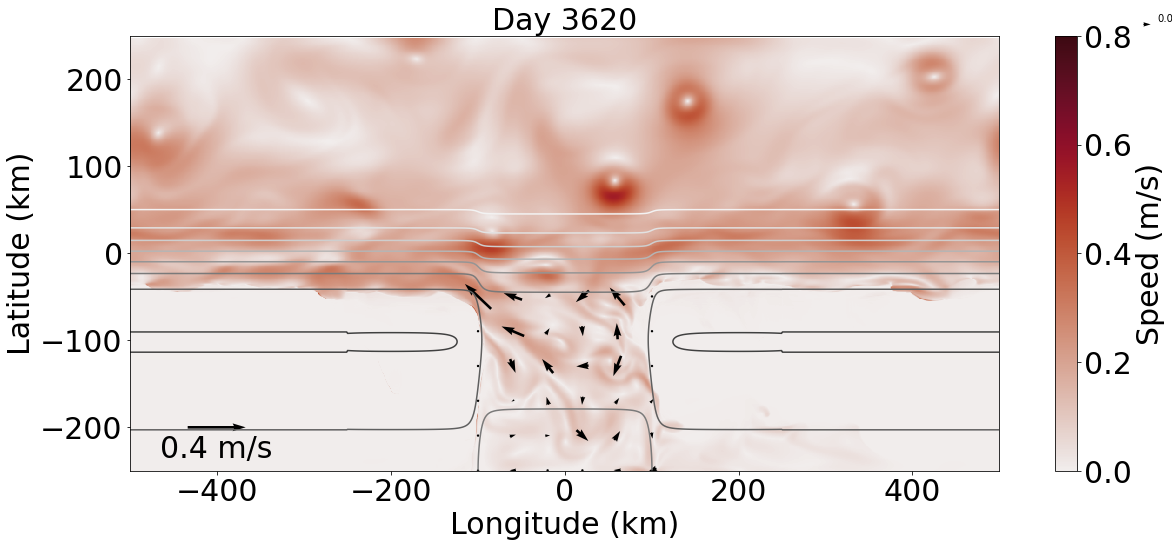

In [37]:
## cases wiht quivers for poster

c_levels = range(-3000,300,300) #-3000,300,300, 500,500 for narrowest
#for t in range(365*2,365*3):
for t in [335]:#[50,220,335]
    print(t)

    if t % 100 == 0 :
        print(t)
    plt.figure(figsize = (20,8)) # 15,8
    ax = plt.axis('scaled')
    speed_matrix = ((dsx_prog_uh_seltime.isel(Time = t, zl = nlayers -2)**2 +dsx_prog_vh_seltime.isel(Time =  t, zl = nlayers -2)**2)**(0.5))  
    cmap = (speed_matrix).plot(vmax = 0.8, vmin = 0, add_colorbar = False, cmap = cmocean.cm.amp)
    cbar = plt.colorbar(cmap, label = 'Speed (m/s)')
    #dsx_prog_daily.plot.quiver( dsx_prog_daily.coords['xh'],dsx_prog_daily.coords['yh'], ax, dsx_prog_uh_seltime.isel(Time = t, zl = nlayers - 2).values, dsx_prog_vh_seltime.isel(Time = t, zl = nlayers - 2))
    
    # Defining the quiver plot
    space_quiv = 6 # no of quivers in plot
    scale_quiv = 6 #length scale of quiver 3/8
    width_quiv = 0.003
    rect_quiv =  100## area taken up for quivers (100 for wide steep, 50 for narrow 100km)
    resample = dsx_prog_uh_seltime.isel(Time = t, zl = nlayers - 2).sel( xh = np.linspace(-rect_quiv,rect_quiv,space_quiv), yh = np.linspace(-250,-50,space_quiv), method = "nearest").to_dataset(name = 'u')
    resample['v'] = (dsx_prog_vh_seltime.isel(Time = t, zl = nlayers - 2).sel( xh = np.linspace(-rect_quiv,rect_quiv,space_quiv), yh = np.linspace(-250,-50,space_quiv), method = "nearest"))
    quiver = resample.plot.quiver(x='xh', y='yh', u='u', v='v', scale=scale_quiv, width = width_quiv)#, headwidth = 2, headlength = 4, headaxislength = 3.5)      
    
    # Vector options declaration
    veclenght = 0.4
    maxstr = '%3.1f m/s' % veclenght
    plt.quiverkey(quiver,0.1,0.1,veclenght,maxstr,labelpos='S',fontproperties = dict({'size':30}), coordinates='axes')#.set_zorder(11)

    dsx_prog.e.isel(zi = nlayers, Time = -1).plot.contour(cmap = 'Greys', levels = c_levels)
    plt.title('Day %i' % int(365*9 +t) ) 
    plt.ylabel('Latitude (km)')
    plt.xlabel('Longitude (km)')

    #plt.savefig(outfolder + '/quiver_speed_CDW_daily_t%04d.png' % (t), dpi = 600) #.svg
    #plt.savefig(outfolder + '/quiver_speed_CDWanomaly_daily_t%04d.png' % (t), dpi = 600) #.svg
    plt.savefig(outfolder + '/speed/figquiver_speed_CDWspacingL_daily_t%04d.png' % (t), dpi = 600)
    #plt.savefig(outfolder + '/quiver_speed_CDW_daily_t%04d.jpg' % (t)) #.svg

    #plt.close()
    #print(transport_dir)
    #plt.show()

In [25]:
outfolder

'/g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02'